# Neutrino oscillation over a distance

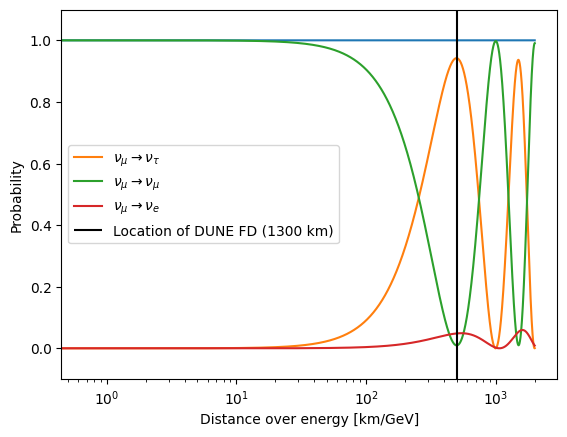

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#Experimental values 
theta12=np.radians(33.68)
theta13=np.radians(8.52)
theta23=np.radians(48.5)
deltacp=np.radians(177)

deltam31=2.534*10**(-3)
deltam21=7.49*10**(-5)
deltam32=deltam31-deltam21



deltam = [deltam21,deltam31,deltam32]

# Cos and sin calculations
c12=np.cos(theta12)
c13=np.cos(theta13)
c23=np.cos(theta23)
s12=np.sin(theta12)
s13=np.sin(theta13)
s23=np.sin(theta23)

# PMNS matrix calculation
firstmatrix=np.array([[1,0,0],[0,c23,s23],[0,-1*s23,c23]])
secondmatrix=np.array([[c13,0,s13*np.exp(-1*deltacp*1j)],[0,1,0],[-s13*np.exp(deltacp*1j),0,c13]])
thirdmatrix=np.array([[c12,s12,0],[-1*s12,c12,0],[0,0,1]])


#using the matrix multiplication operation @ in numpy
U=firstmatrix @ secondmatrix @ thirdmatrix


def probability(distance, energy, alpha, beta):
    deltaalphabeta=0
    if alpha==beta:
        deltaalphabeta=1
    j=0
    k=0
    sum1=0
    sum2=0
    while(j<3):
        while(j>k):
            mixmatrixproduct=np.conj(U[alpha][j])*U[beta][j]*U[alpha][k]*np.conj(U[beta][k])
            squaresin=((np.sin((1.27*deltam[j+k-1]*distance)/(energy)))**2)
            
            sum1=np.real(mixmatrixproduct)*squaresin+sum1

            notsin=np.sin(1.27*2*deltam[j+k-1]*distance/(energy))
            #print(str(j) + " " + str(k) + " " + str(mixmatrixproduct) + str(deltam[j+k-1]))
            sum2=np.imag(mixmatrixproduct)*notsin+sum2
            
            
            k=k+1
        k=0
        j=j+1
        
    
    return deltaalphabeta-4*sum1+2*sum2


E=2.6
x= np.linspace(0, 2*E*10**3, 3000)

fig,ax=plt.subplots(1,1)
plt.plot(x/E,probability(x,E,1,0)+probability(x,E,1,1)+probability(x,E,1,2))
plt.plot(x/E, probability(x,E,1,2), label=r'$\nu_\mu\rightarrow\nu_\tau$')
plt.plot(x/E, probability(x,E,1,1), label=r'$\nu_\mu\rightarrow\nu_\mu$')
plt.plot(x/E, probability(x,E,1,0), label=r'$\nu_\mu\rightarrow\nu_e$')
plt.vlines(1300/E,-1,2,colors="black",label="Location of DUNE FD (1300 km)")
ax.set_xscale("log")
ax.set_ylim([-.1, 1.1])
ax.legend()
plt.xlabel("Distance over energy [km/GeV]")
plt.ylabel("Probability")
plt.show()